In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [3]:
#sys.path.append("../..")
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

#from testing.test_utils import load_test_output_pn


In [4]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [100]:
# define run locations #############
resnet_locs = ['/home/prouse/WatChMaL/WatChMaL/outputs/short_tank_barrel_fix_OD_veto/outputs']

resnet_titles = ['ResNet, charge only']

pointnet_locs = [#'/home/prouse/WatChMaL/WatChMaL/outputs/2021-03-01/19-17-05/outputs/',
                 '/home/prouse/WatChMaL/WatChMaL/outputs/2021-03-19/19-17-58/outputs/',
                 '/home/prouse/WatChMaL/WatChMaL/outputs/2021-06-30/18-08-41/outputs/',
                 '/home/prouse/WatChMaL/WatChMaL/outputs/2021-06-26/07-39-33/outputs/',
                 '/home/prouse/WatChMaL/WatChMaL/outputs/2021-06-26/07-39-43/outputs/',
                 '/home/prouse/WatChMaL/WatChMaL/outputs/2021-07-04/04-24-40/outputs/',
                 '/home/prouse/WatChMaL/WatChMaL/outputs/2021-07-14/12-36-25/outputs/',
                 '/home/prouse/WatChMaL/WatChMaL/outputs/2021-07-16/15-30-29/outputs/',
                 '/home/prouse/WatChMaL/WatChMaL/outputs/2021-07-18/22-05-45/outputs/']

# pointnet_titles = ['PointNet 3-class 40 epoch',
#                    'PointNet 2-class extra data 20 epoch',
#                    'PointNet 2-class extra data 20 epoch no times']
pointnet_titles = [#'PointNet 3-class 40 epoch',
                   'PointNet, charge only',
                   'PointNet, 256ch meanpool',
                   'PointNet, 1.5ns TTS',
                   'PointNet, 2.5ns TTS',
                   'PointNet, 1024ch mixed',
                   'PointNet, 1024ch meanpool',
                   'PointNet, 1024ch maxpool',
                   'PointNet, 256ch maxpool']

resnet_linecolor = [c[0]]
resnet_linestyle = ['-']

pointnet_linecolor = [c[1], c[1], c[3], c[4], c[2], c[2], c[2], c[1]]
pointnet_linestyle = ['-', '--', '-.', '-.', '-.', '--', ':', ':']

In [101]:
# fig = multi_disp_learn_hist(resnet_locs, losslim=2.5, titles=resnet_titles, leg_font=15, title_font=15, xmax=20)

i:  0
Found training logs:  ['/home/prouse/WatChMaL/WatChMaL/outputs/2021-03-19/19-17-58/outputs/log_train_0.csv', '/home/prouse/WatChMaL/WatChMaL/outputs/2021-03-19/19-17-58/outputs/log_train_1.csv']
i:  1
Found training logs:  ['/home/prouse/WatChMaL/WatChMaL/outputs/2021-06-30/18-08-41/outputs/log_train_0.csv', '/home/prouse/WatChMaL/WatChMaL/outputs/2021-06-30/18-08-41/outputs/log_train_1.csv']
i:  2
Found training logs:  ['/home/prouse/WatChMaL/WatChMaL/outputs/2021-06-26/07-39-33/outputs/log_train_0.csv', '/home/prouse/WatChMaL/WatChMaL/outputs/2021-06-26/07-39-33/outputs/log_train_1.csv']
i:  3
Found training logs:  ['/home/prouse/WatChMaL/WatChMaL/outputs/2021-06-26/07-39-43/outputs/log_train_0.csv', '/home/prouse/WatChMaL/WatChMaL/outputs/2021-06-26/07-39-43/outputs/log_train_1.csv']
i:  4
Found training logs:  ['/home/prouse/WatChMaL/WatChMaL/outputs/2021-07-04/04-24-40/outputs/log_train_0.csv', '/home/prouse/WatChMaL/WatChMaL/outputs/2021-07-04/04-24-40/outputs/log_train_1.c

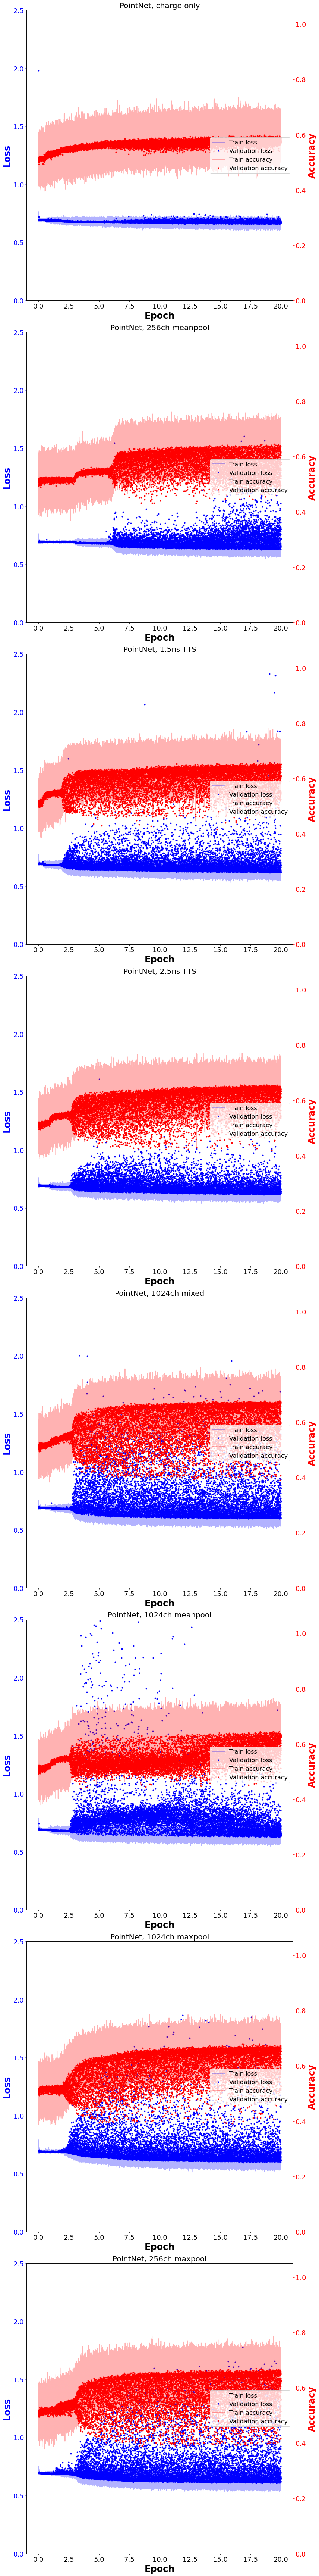

In [102]:
fig = multi_disp_learn_hist(pointnet_locs, losslim=2.5, titles=pointnet_titles, leg_font=15, title_font=15, xmax=40)

In [115]:
resnets = [0]
pointnets=[0,1,5,4,6]

In [116]:
locs = [resnet_locs[i] for i in resnets] + [pointnet_locs[i] for i in pointnets]
titles = [resnet_titles[i] for i in resnets] + [pointnet_titles[i] for i in pointnets]
linecolor = [resnet_linecolor[i] for i in resnets] + [pointnet_linecolor[i] for i in pointnets]
linestyle = [resnet_linestyle[i] for i in resnets] + [pointnet_linestyle[i] for i in pointnets]

In [117]:
############# load short tank run data #############
short_raw_output_softmax    = [np.load(loc + "/softmax.npy") for loc in locs]
short_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in locs]

In [118]:
############# compute short tank multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(short_raw_output_softmax, short_raw_actual_labels,
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


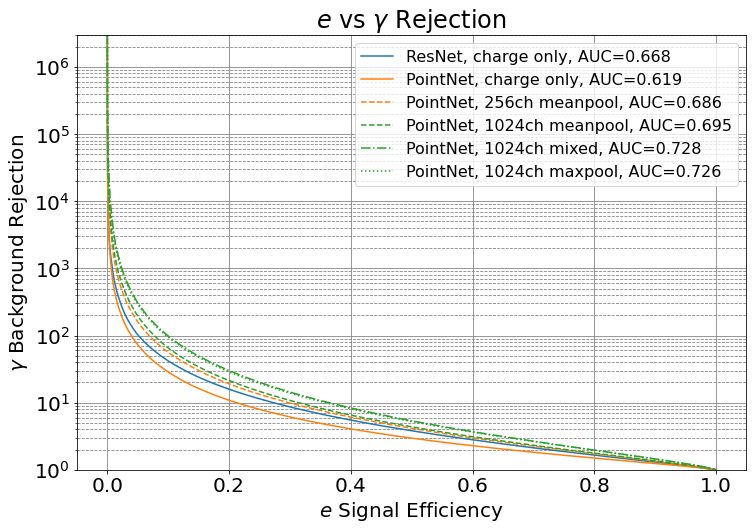

In [119]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[1,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


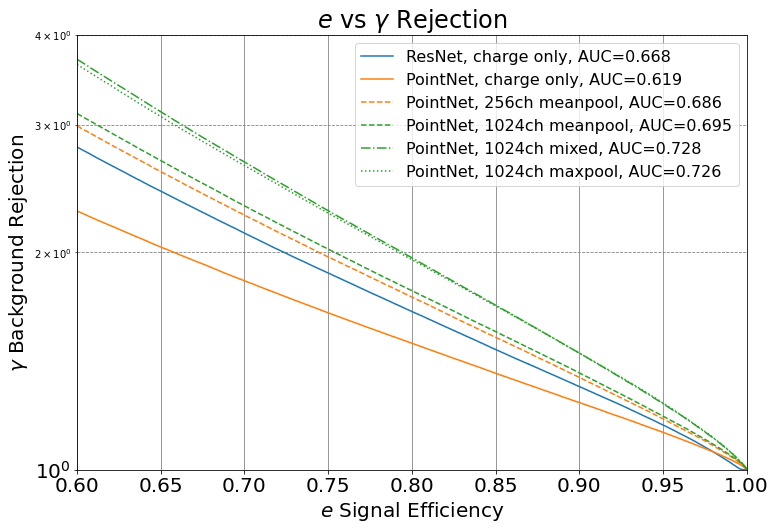

In [120]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], xlims=[[0.6,1.0]], ylims=[[1,4]],
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)#,
                      #leg_loc='lower left')